# Final Project 1 - SQL Database for AirBnB

In [1]:
import mysql
import mysql.connector
dbconfig = {'host': '127.0.0.1',
            'user': 'root',
            'password':'04Nov1992',
            'database':'airbnb'}

conn = mysql.connector.connect(**dbconfig)
cursor = conn.cursor()

In [18]:
#i. What are people saying about me (somebody)?
#Ans. Get the reviews for each of the Listing from the Revies table gropu by ListingId.

sql = "select * from Reviews a , listingdetails b where a.listing_id = b.﻿ListingId  group by listing_id limit 5;"
cursor.execute(sql)
res = cursor.fetchall()
print(res)

[(49075, datetime.datetime(2015, 3, 8, 0, 0), 24939297, 'Romain', "We had the greatest week end in Amsterdam thanks to this appartment.\r\r\nThe appartment is beautiful, spacious, very convenient and well situated. Esther, Rick and their friend Nora were very nice and welcoming (bottle of wine as welcome gift) ! We almost did every thing by foot to visit the city, the museums are just next to the flat and the nice places to have a walk and see the canals also. \r\r\nDuring the night we also stoped by some bars in the neigborhood and they were very fun ! \r\r\nMy conclusion is, you will not be desapointed by this place, on the contrary you will be very pleased ! If I want to live in Amsterdam one day I will look for an appartment as pretty and well situated than Esther and Rick's appartment.\r\r\nSorry for my faults I'm french :-)\r\r\n\r\r\nRomain", 49075, 'Entire Studio/Apt. in  LA/Gardena', 'No smoking inside, no pets', 'Harbor Gateway, Los Angeles, CA 90249, United States', 'Harbor 

In [3]:
#ii. How viral are my posts?
#Ans. Get the sum of all the fav_cnt and group by users order by fav_cnt desc;
#     The user with most counts has the most viral posts.
sql = "SELECT sum(fav_cnt) cnt, user_name FROM airbnb.TD group by user_name order by cnt desc limit 5;"
cursor.execute(sql)
res = cursor.fetchall()
print(res)


[(Decimal('251'), 'CGTNOfficial'), (Decimal('128'), 'cottage_green'), (Decimal('82'), 'UberHotwife'), (Decimal('82'), 'PineRiverRustic'), (Decimal('78'), 'Miteymiss')]


In [4]:
#iii. How much influence to my posts have?
#Ans. Get the sum of all the retweeted tweets and group by users  
#     The users with most counts is most influencial
sql = "SELECT sum(retweet_cnt) cnt, user_name FROM airbnb.TD group by user_name order by cnt desc limit 5;"
cursor.execute(sql)
res = cursor.fetchall()
print(res)


[(Decimal('1067'), 'cottage_green'), (Decimal('385'), 'PineRiverRustic'), (Decimal('225'), 'JanRomes'), (Decimal('174'), 'PetarPan321'), (Decimal('166'), 'FaerieTaleFarm')]


#iv. What posts are like mine?
#Ans. Get the posts of users that post like me.
#. Created a procedure get_posts_like_mine(usr_nm). Takes in user_name [ of datatype varchar(250)] as a parameter. 
#. Searches for top 5 users like the passed user and fetches their post 
"""
CREATE DEFINER=`root`@`localhost` PROCEDURE `get_posts_like_mine`(IN usr_nm varchar(250))
BEGIN
select tweet_txt from airbnb.TD as td 
inner join 
(
select  b.user_name as user_name, count(1)as cnt 
from (select * from user_tags where user_name = usr_nm) a
inner join 
(select * from user_tags) b
on
a.tags = b.tags
and a.user_name <> b.user_name
group by a.user_name, b.user_name 
order by cnt desc limit 5
) as usrs
on 
td.user_name = usrs.user_name;

END
"""

    
"""
Execute the procedure:
CALL get_posts_like_mine('EternityDesignD');
"""
    
#Output:
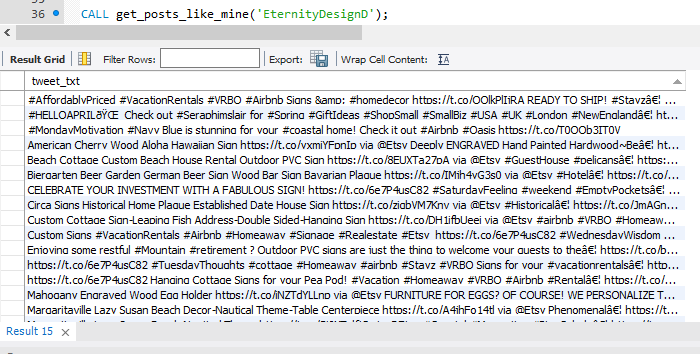



#v. What users post like me?
#Ans. Get users of the posts that match the keywords or hashtags from my posts.
#.     get_usr_like_me(user_name)--> Takes user_name as input. Get the users who's posts contains the similar tags. 
#.     Ordering of similarity is done based on the total number of same tags used in by other users in their tweets.
""" 
CREATE DEFINER=root@localhost PROCEDURE get_usr_like_me(IN usr_nm varchar(250)) BEGIN
select a.user_name, b.user_name, count(1)as cnt 
from (select from user_tags where user_name = usr_nm) a 
inner join 
(select from user_tags) b 
on a.tags = b.tags and a.user_name <> b.user_name group by a.user_name, b.user_name order by cnt desc limit 5;
END 
"""

"""
Execute the procedure:
CALL get_usr_like_me('EternityDesignD')
"""

#. Output:

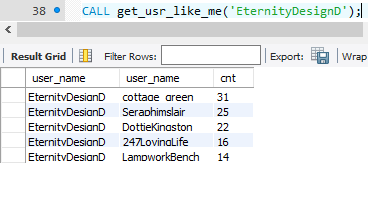

#vi. Who should I be following?
#Ans. Follow users that post like me.

""" 
CREATE DEFINER=root@localhost PROCEDURE get_usr_like_me(IN usr_nm varchar(250)) BEGIN
select a.user_name, b.user_name, count(1)as cnt 
from (select from user_tags where user_name = usr_nm) a 
inner join 
(select from user_tags) b 
on a.tags = b.tags and a.user_name <> b.user_name group by a.user_name, b.user_name order by cnt desc limit 5;
END 
"""

"""
Execute the procedure:
CALL get_usr_like_me('EternityDesignD')
"""

#. Output:

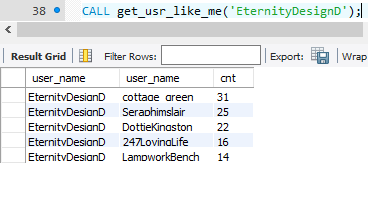

#vii. What topics are trending in my domain?
#Ans. Get popular hashtags within specific time-period. 
#,     Takes input as Lower limit date and upper limit date as varchar(30). 
#.     Valid Formats to pass date 'YYYY-MM-DD' OR 'YYYY-MM-DD HH:MM:SS'
"""
CREATE DEFINER=`root`@`localhost` PROCEDURE `get_what_is_trending`(IN ll_dt varchar(30), IN ul_dt varchar(30))
BEGIN
declare tag varchar(250);

drop temporary table if exists trend_tags;
create temporary table if not exists trend_tags as 
select distinct tags from (
select tag1 as tags from airbnb.TD where trim(tag1) <> '' and cre_tms between ll_dt and ul_dt
union
select tag2 from airbnb.TD where trim(tag2) <> '' and cre_tms between ll_dt and ul_dt
union
select tag3 from airbnb.TD where trim(tag3) <> '' and cre_tms between ll_dt and ul_dt
union
select tag4 from airbnb.TD where trim(tag4) <> '' and cre_tms between ll_dt and ul_dt
union
select tag5 from airbnb.TD where trim(tag5) <> '' and cre_tms between ll_dt and ul_dt
union
select tag6 from airbnb.TD where trim(tag6) <> '' and cre_tms between ll_dt and ul_dt
union
select tag7 from airbnb.TD where trim(tag7) <> '' and cre_tms between ll_dt and ul_dt
union
select tag8 from airbnb.TD where trim(tag8) <> '' and cre_tms between ll_dt and ul_dt
union
select tag9 from airbnb.TD where trim(tag9) <> '' and cre_tms between ll_dt and ul_dt
union
select tag10 from airbnb.TD where trim(tag10) <> '' and cre_tms between ll_dt and ul_dt
union
select tag11 from airbnb.TD where trim(tag11) <> '' and cre_tms between ll_dt and ul_dt
) as a ;

drop temporary table if exists trend_tag_cnt;
create temporary table trend_tag_cnt (
tags_txt varchar(250),
cnt int
);

while (select count(1) from trend_tags )> 0
do
select tags into tag from trend_tags limit 1;

insert into  trend_tag_cnt select tag, get_trnd_tag_count(tag, ll_dt, ul_dt);
delete from trend_tags where tags = tag;
end while; 

select * from trend_tag_cnt order by cnt desc limit 3;
END

"""

"""
CALL get_what_is_trending('2018-04-04', '2018-04-06')
"""

#. Output:

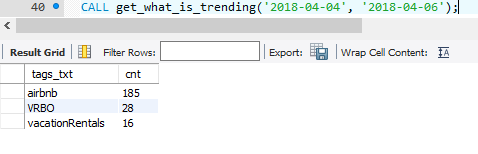


#viii. What keywords/ hashtags should I add to my post?
#Ans.  Get popular hashtags from similar posts like mine.
"""
CREATE DEFINER=`root`@`localhost` PROCEDURE `tags_to_add_in_posts`(IN usr_nm varchar(250))
BEGIN

select count(1) as cnt, tags from user_tags as td 
inner join 
(
select  b.user_name as user_name, count(1)as cnt 
from (select * from user_tags where user_name = usr_nm) a
inner join 
(select * from user_tags) b
on
a.tags = b.tags
and a.user_name <> b.user_name
group by a.user_name, b.user_name 
order by cnt desc limit 5
) as usrs
on 
td.user_name = usrs.user_name
group by 2 order by cnt desc limit 3;

END
"""

    
"""
CALL tags_to_add_in_posts('EternityDesignD')
"""

#. Output:
    
 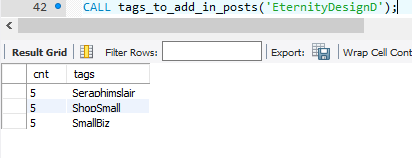

#ix. Should I follow somebody back?
#Ans. Follow users who post like me.

"""
CALL get_usr_like_me('EternityDesignD')
"""

#. Output:

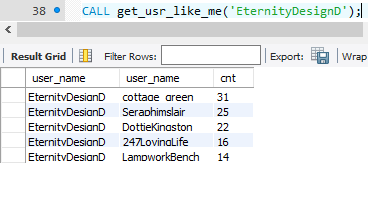

In [5]:
#x. What is the best time to post?
#Ans. Timeframe in which you get max share/likes/re-tweets
sql = "select retweet_cnt, dayname(cre_tms) day_of_week from airbnb.TD group by 2 order by 1 desc;"
cursor.execute(sql)
res = cursor.fetchall()
print(res)

[(80, 'Sunday'), (20, 'Tuesday'), (20, 'Friday'), (4, 'Monday'), (4, 'Thursday'), (0, 'Wednesday'), (0, 'Saturday')]


In [8]:
#xi. Should I add and picture or url to my post?
#Ans. Check for likes/retweets of posts with and without URL.
#     IF count is of posts' likes/retweets with URL > count of posts' likes/retweets without URL
#     THEN
#     URL is should be metioned in post
#     ELSE
#     No need to add URL to post.
sql = "select case when fav_cnt_no_url  > fav_cnt_url then 'Should Contain URL' else 'Should not contain url' end as url from (select sum(fav_cnt) fav_cnt_no_url from airbnb.TD where trim(urls)='') a, (select sum(fav_cnt) fav_cnt_url from airbnb.TD where trim(urls)<>'')b;"
cursor.execute(sql)
res = cursor.fetchall()
print(res)

[('Should not contain url',)]


In [11]:
#xii. What’s my reach?
#Ans. Get the relative distance by getting the sum of all the retweets per user and subtracting the avg retweet_cnt.
#     The user with max relative cnt would have the most reach. 
sql = "select b.retweet_cnt - a.avg_cnt as rel_cnt, user_name from (select sum(retweet_cnt) as retweet_cnt, user_name from TD group by user_name)b, (select avg(retweet_cnt) as avg_cnt from TD) a order by rel_cnt desc limit 5;"
cursor.execute(sql)
res = cursor.fetchall()
print(res)

[(Decimal('1060.4735'), 'cottage_green'), (Decimal('378.4735'), 'PineRiverRustic'), (Decimal('218.4735'), 'JanRomes'), (Decimal('167.4735'), 'PetarPan321'), (Decimal('159.4735'), 'FaerieTaleFarm')]
